In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
x = data.drop(['class'],axis=1)
y = pd.DataFrame(data['class'])

In [8]:
from sklearn import preprocessing
lb_en = preprocessing.LabelEncoder()
x = data.drop(['class'],axis=1)
for i in x:
    x[i]=lb_en.fit_transform(x[i])
x=pd.DataFrame(x)
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [9]:
x.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [11]:
x_train.shape

(5686, 22)

In [12]:
y_train.shape

(5686, 1)

In [13]:
x_test.shape

(2438, 22)

In [14]:
y_test.shape

(2438, 1)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from sklearn.linear_model import LogisticRegression
lt_model = LogisticRegression()
lt_model.fit(x_train,y_train)
y_pred = lt_model.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy Score is:',round(accuracy_score(y_test,y_pred),2))

Accuracy Score is: 0.95


Text(0, 0.5, 'accuracy')

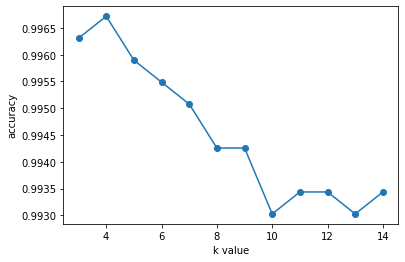

In [17]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [18]:
Classifier = KNeighborsClassifier(n_neighbors=4, metric = 'minkowski')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
print('Accuracy Score is:',round(accuracy_score(y_test,y_pred),2))

Accuracy Score is: 1.0


In [19]:
Classifier = KNeighborsClassifier(n_neighbors=4, metric = 'minkowski')
Classifier.fit(x_test, y_test)
y_pred = Classifier.predict(x_train)
print('Accuracy Score is:',round(accuracy_score(y_train,y_pred),2))

Accuracy Score is: 0.99


In [20]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
y_pred = dec_tree.predict(x_test)
print('Accuracy Score is:',round(accuracy_score(y_test,y_pred),2))

Accuracy Score is: 1.0


In [21]:
# Checking for overfitting
dec_tree.fit(x_test,y_test)
y_pred = dec_tree.predict(x_train)
print('Accuracy Score is:',round(accuracy_score(y_train,y_pred),2))

Accuracy Score is: 1.0


In [22]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_test,y_test)
y_pred = svc.predict(x_test)
print('Accuracy Score is:',round(accuracy_score(y_test,y_pred),2))

Accuracy Score is: 0.96


In [23]:
svc = SVC(kernel='poly')
svc.fit(x_test,y_test)
y_pred = svc.predict(x_test)
print('Accuracy Score is:',round(accuracy_score(y_test,y_pred),2))

Accuracy Score is: 0.99


In [24]:
svc = SVC(kernel='rbf')
svc.fit(x_test,y_test)
y_pred = svc.predict(x_test)
print('Accuracy Score is:',round(accuracy_score(y_test,y_pred),2))

Accuracy Score is: 0.98


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy Score is:',round(accuracy_score(y_test,y_pred),2))

Accuracy Score is: 1.0


In [26]:
rf.fit(x_test,y_test)
y_pred=rf.predict(x_train)
print('Accuracy Score is:',round(accuracy_score(y_train,y_pred),2))

Accuracy Score is: 1.0


In [29]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('Accuracy Score is:',round(accuracy_score(y_test,y_pred),2))

Accuracy Score is: 0.85


SyntaxError: invalid syntax (1548214835.py, line 2)